In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Tru-pro/Desktop/Fake-tweet-test/d'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/Tru-pro/Desktop/Fake-tweet-test/d\Corona_NLP_test.csv
C:/Users/Tru-pro/Desktop/Fake-tweet-test/d\Corona_NLP_train.csv
C:/Users/Tru-pro/Desktop/Fake-tweet-test/d\en_dup.csv


In [69]:
# Let's get both the data
#fake = pd.read_csv('C:/Users/Tru-pro/Desktop/fAKE Tweet/data/Fake.csv')
#true = pd.read_csv('C:/Users/Tru-pro/Desktop/fAKE Tweet/data/True.csv')
df = pd.read_csv("d/spamham.csv")

In [70]:
# Fake news
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
# Real/True news
#true.head()

In [72]:
# Let's insert a new column 'Real_or_Fake'.It will help when we combine both the tables in determining 
# Fake or Real news
#fake['Real_or_Fake'] = 'Fake'
#true['Real_or_Fake'] = 'Real'

**Combining fake and true table into one**

In [73]:
#news = pd.concat([true,fake],axis=0,ignore_index=True)

# First 5 rows of the news table
#news.head()

In [74]:
from sklearn.preprocessing import LabelEncoder
le_3 = LabelEncoder()
label_3=le_3.fit_transform(df["Category"])
df["Category"]=label_3

df.head(10)


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


0    4825
1     747
Name: Category, dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

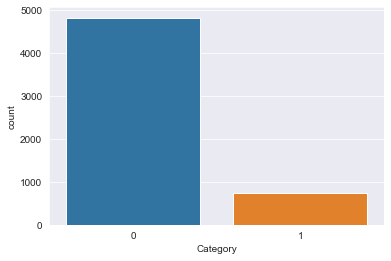

In [75]:
# Count of real and fake news
print(df['Category'].value_counts())

sns.countplot(x='Category',data=df)

In [76]:
df.isnull().sum()
d=1.5

In [77]:
# Let's check if there is any null value in text column.
df['Message'].isnull().sum()

0

**There is no null value.But there might be empty string, we will deal with it later**

# Data Cleaning

**URL**

In [78]:
# Let's read one news
df['Message'].iloc[390]

'Yup having my lunch buffet now.. U eat already?'

**There might be a url provided in a news text which will not be useful as they provide no information in the form of text.We have to go to the url to obtain more information.Let's remove any url present in the text for all the news**

In [79]:
# Function to remove the url
def remove_url(text):
    text = text.split(' ')
    text1 = ''
    for word in text:
        if ('.com' in word) or ('https' in word) or ('bit.ly' in word):
            continue
        else:
            text1 += (word+' ')
    return text1

# Lets apply this on news text
df['Message'] = df['Message'].apply(remove_url)

**Empty String**

In [80]:
# Let's check if any news text is just an empty string

# empty will hold the index of the empty string text
empty = []

# for loop to find the empty string
for i,title,text,*_ in df.itertuples():
    if text.isspace() or text=='':
        empty.append(i)
        
# number of rows with empty string as form of news text
print(f"There are total {len(empty)} rows with empty string as df text")
a=1.6

There are total 0 rows with empty string as df text


In [81]:
# Let's remove these empty strings
df.drop(empty,inplace = True)

**HTML tags**

In [82]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Let's remove any HTML tags present in news text
# We can use BeautifulSoup to do it
from bs4 import BeautifulSoup

# function to remove the HTML tags
def remove_html(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()
    
    return text

# Let's apply the above function on news text
df['Message'] = df['Message'].apply(remove_html)

In [84]:
# Let's read some more news
df['Message'][0][:50]

'Go until jurong point, crazy.. Available only in b'

In [85]:
df['Message'][6][:50]

'Even my brother is not like to speak with me. They'

In [86]:
# WASHINGTON (Reuters) or SEATTLE/WASHINGTON (Reuters) are there at the begining of many news text.
# Our model might learn that if these words are at the begining of the news text,they must belong to one category and might 
# not try to learn from the text that follows.

# Let's go ahead and remove these words from the news text
# we will split the text on the basis of (Reuters) and ignore the first part

# function to perform the split
def split_news(text):
    if '(Reuters)' in text:
        text = text.split('(Reuters)')

        return ' '.join(text[1:])
    return text

# Applying the above function on the news text
df['Message'] = df['Message'].apply(split_news)

**Punctuation**

In [87]:
# Let's remove the punctuations from the news text
#import string

#punctuations = string.punctuation

# Lets add '\n','\n\n' and ' ' in punctuations
#punctuations += '\n \n\n'

#function to remove the punctuations
#def remove_punct(text):
#    text = text.split(' ')
#    text  = [word.lower() for word in text if word not in punctuations]
    
#    return ' '.join(text)

# applying the above function in news text
#news['text'] = news['text'].apply(remove_punct)

**Let's divide the data into X and y. X will be news text and y would be label- Fake or Real.**

In [88]:
X = df['Message']
y = df['Category']

# Lets do the one hot encoding to convet y
encoded_y = pd.get_dummies(y,drop_first=True)

**1 in encoded_y means Real news and 0 means Fake news**

In [89]:
# Libraries to split the data into train and test data,create maodel and evaluating the matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score,f1_score

In [90]:
# Lets split the data into train and test data. We will use 25% of the data as test data
#X_train,X_test,y_train,y_test = train_test_split(X,encoded_y.values.reshape(-1,),test_size=0.25,random_state=0)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size = 0.3, random_state= 0)

**Naive_bayes model**

In [92]:
# creating a naive model
pipeline_naive = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])

# training the model
pipeline_naive.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [93]:
# prediction
predict_naive = pipeline_naive.predict(X_test)

In [94]:
# Evaluating the naive model
acc_naive = accuracy_score(y_test,predict_naive)
print(f'Naive model has {acc_naive.round(2)*100}% accuracy')
print('\n')
#print(classification_report(y_test,predict_naive))



Naive model has 97.0% accuracy




**Logistic Regression Model**

In [95]:
# creating a logistic model
pipeline_logistic = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',LogisticRegression())
])

# training the model
pipeline_logistic.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LogisticRegression())])

In [96]:
# prediction
predict_logistic = pipeline_logistic.predict(X_test)

In [97]:
# Evaluating the logistic model
acc_logistic = accuracy_score(y_test,predict_logistic)
print(f'LogisticRegression model has {acc_logistic.round(2)*100}% accuracy')
print('\n')
#print(classification_report(y_test,predict_logistic))

LogisticRegression model has 96.0% accuracy




**LinearSVC model**

In [98]:
# creating a LinearSVC model
pipeline_svc = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',LinearSVC())
])

# training the model
pipeline_svc.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LinearSVC())])

In [99]:
# prediction
predict_svc = pipeline_svc.predict(X_test)

In [100]:
# Evaluating the LinearSVC model
acc_svc = accuracy_score(y_test,predict_svc)
print(f'LinearSVC model has {acc_svc.round(2)*100}% accuracy')
print('\n')
#print(classification_report(y_test,predict_svc))

LinearSVC model has 99.0% accuracy




Text(0, 0.5, 'Accuracy')

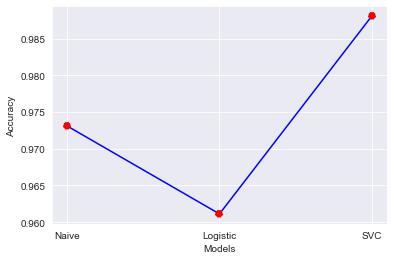

In [101]:
# Let's visualize the accuracy of all the three models
models = {
    'Naive':acc_naive,
    'Logistic':acc_logistic,
    'SVC':acc_svc
}

sns.set_style('darkgrid')
plt.plot(models.keys(),models.values(),marker='*',color='blue',markeredgecolor='red',markeredgewidth=4)
plt.xlabel('Models')
plt.ylabel('Accuracy')

In [102]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
#modeling
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)

In [104]:

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size = 0.3, random_state= 0)

classifiers = [LogisticRegression(),KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(),MultinomialNB(),LinearSVC()]
for classifier in classifiers:
    print("\n\n", classifier)
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)



 LogisticRegression()
Accuarcy: 96.89
Confusion Matrix: 
 [[1449    2]
 [  50  171]]


 KNeighborsClassifier()
Accuarcy: 96.29
Confusion Matrix: 
 [[1451    0]
 [  62  159]]


 DecisionTreeClassifier()
Accuarcy: 96.17
Confusion Matrix: 
 [[1429   22]
 [  42  179]]


 GradientBoostingClassifier()
Accuarcy: 96.95
Confusion Matrix: 
 [[1444    7]
 [  44  177]]


 RandomForestClassifier()
Accuarcy: 97.73
Confusion Matrix: 
 [[1451    0]
 [  38  183]]


 MultinomialNB()
Accuarcy: 95.93
Confusion Matrix: 
 [[1451    0]
 [  68  153]]


 LinearSVC()
Accuarcy: 98.86
Confusion Matrix: 
 [[1450    1]
 [  18  203]]


# Optimized With Bio-Inspired Metaheuristic Algorithms


In [105]:
from sklearn import svm
#from sklearn.model_selection import GridSearchCV
from genetic_selection import GeneticSelectionCV

In [106]:

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["Message"])


X1 = x.toarray()
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size = 0.3, random_state= 0)

In [108]:
estimator = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0)

In [109]:
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=200,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)

In [110]:

# training the model
selector.fit(X_train,y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                            	min                    	max                      
0  	50    	[0.86581026 5.2       ]	[2.37486842e-03 2.99332591e+00]	[0.86410256 1.        ]	[ 0.87692308 10.        ]
1  	25    	[-2199.32385128    96.94      ]	[4142.82212789  172.27413155]  	[-1.e+04  1.e+00]      	[  0.87692308 446.        ]
2  	31    	[-1799.28789744    74.86      ]	[3842.20817767  156.70494695]  	[-1.e+04  1.e+00]      	[  0.88769231 458.        ]
3  	21    	[-1999.30260513    92.96      ]	[4000.34869744  173.8650005 ]  	[-1.e+04  1.e+00]      	[  0.88769231 471.        ]
4  	33    	[-2599.35141538   109.56      ]	[4386.72688777  183.13843507]  	[-1.e+04  2.e+00]      	[  0.88769231 464.        ]
5  	29    	[-2199.31307692   103.28      ]	[4142.82784999  181.1671096 ]  	[-1.e+04  2.e+00]      	[  0.88897436 468.        ]
6  	23    	[-1799.27472308    86.        ]	[3842.21435014  167.99797618]  	[-1.e+04  4.e

GeneticSelectionCV(caching=True, crossover_independent_proba=0.5, cv=5,
                   estimator=SVC(C=2.0, random_state=0), max_features=10,
                   n_gen_no_change=10, n_generations=200, n_jobs=-1,
                   n_population=50, scoring='accuracy', verbose=1)

In [111]:
y_pred = selector.predict(X_test)

In [112]:
acc_svm1 = accuracy_score(y_test,y_pred)

In [113]:
print(f'LinearSVC model has {acc_svm1*100}% accuracy')
print('\n')

LinearSVC model has 89.05502392344498% accuracy




In [114]:
estimator = MultinomialNB()#svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0)
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=200,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)


selector.fit(X_train,y_train)
y_pred = selector.predict(X_test)
acc_mnb1 = accuracy_score(y_test,y_pred)
print(f'mnb model has {acc_mnb1*100}% accuracy')
print('\n')

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                            	min                    	max                      
0  	50    	[0.86512821 5.94      ]	[4.44089210e-16 2.84541737e+00]	[0.86512821 1.        ]	[ 0.86512821 10.        ]
1  	29    	[-2399.34250256   107.16      ]	[4271.20078247  184.34330582]  	[-1.e+04  1.e+00]      	[  0.86512821 471.        ]
2  	33    	[-2199.3252    88.56  ]        	[4142.8214116  172.8115922]    	[-10000.      0.]      	[  0.86512821 464.        ]
3  	32    	[-2999.39441026   116.54      ]	[4582.9721465   189.54305157]  	[-10000.      0.]      	[  0.86512821 469.        ]
4  	26    	[-3399.42901538   113.8       ]	[4737.49753175  188.41220767]  	[-10000.      0.]      	[  0.86512821 511.        ]
5  	17    	[-1199.23868718    51.78      ]	[3249.89649524  137.40280783]  	[-1.e+04  1.e+00]      	[  0.86512821 448.        ]
6  	27    	[-2799.37710769   107.96      ]	[4490.37730573  190.56200671]  	[-10000.     

In [115]:
estimator = LogisticRegression()#svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0)
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=200,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)


selector.fit(X_train,y_train)
y_pred = selector.predict(X_test)
acc_lr1 = accuracy_score(y_test,y_pred)
print(f'mnb model has {acc_lr1*100}% accuracy')
print('\n')

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                            	min                    	max                      
0  	50    	[0.86512308 5.7       ]	[3.58974359e-05 2.80891438e+00]	[0.86487179 1.        ]	[ 0.86512821 10.        ]
1  	30    	[-1599.27329231    72.4       ]	[3666.3777172   159.07432225]  	[-1.e+04  1.e+00]      	[  0.86512821 476.        ]
2  	31    	[-1999.30789744    87.94      ]	[4000.34605128  171.03314416]  	[-1.e+04  1.e+00]      	[  0.86512821 453.        ]
3  	30    	[-2799.37710769   125.96      ]	[4490.37730573  199.21676235]  	[-1.e+04  1.e+00]      	[  0.86512821 481.        ]
4  	29    	[-2599.35980513    87.96      ]	[4386.72191475  173.6757853 ]  	[-10000.      0.]      	[  0.86512821 478.        ]
5  	34    	[-2799.37710769   103.9       ]	[4490.37730573  183.1619229 ]  	[-10000.      0.]      	[  0.86512821 469.        ]
6  	33    	[-2999.39441026    94.44      ]	[4582.9721465   180.44746161]  	[-10000.     

In [116]:
estimator = DecisionTreeClassifier()#svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0)
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=200,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)


selector.fit(X_train,y_train)
y_pred = selector.predict(X_test)
acc_dt1 = accuracy_score(y_test,y_pred)
print(f'mnb model has {acc_dt1*100}% accuracy')
print('\n')

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                      
0  	50    	[0.86592308 5.46      ]	[0.00305344 2.94081621]	[0.86333333 1.        ]	[ 0.88487179 10.        ]
1  	20    	[-2599.35792308   121.4       ]	[4386.72303033  195.17612559]	[-1.e+04  1.e+00]      	[  0.88487179 488.        ]
2  	34    	[-3199.4083641   118.98     ]  	[4665.16737476  183.79831229]	[-1.e+04  2.e+00]      	[  0.88692308 460.        ]
3  	34    	[-2999.38931282    95.6       ]	[4582.97548356  170.5030205 ]	[-1.e+04  2.e+00]      	[  0.88692308 470.        ]
4  	34    	[-2399.33464615    84.52      ]	[4271.2051974   163.63229999]	[-1.e+04  2.e+00]      	[  0.89153846 450.        ]
5  	28    	[-2799.36535897   129.38      ]	[4490.38463235  211.22943829]	[-1.e+04  4.e+00]      	[  0.89230769 831.        ]
6  	29    	[-2399.3272359    93.76     ]  	[4271.20936161  171.63479368]	[-1.e+04  5.e+00]      	[  0.89435897 486

In [117]:
estimator = RandomForestClassifier()#svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0)
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=200,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)


selector.fit(X_train,y_train)
y_pred = selector.predict(X_test)
acc_rf1 = accuracy_score(y_test,y_pred)
print(f'mnb model has {acc_rf1*100}% accuracy')
print('\n')

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                      
0  	50    	[0.86633333 5.02      ]	[0.00313167 2.88090264]	[0.86435897 1.        ]	[ 0.87871795 10.        ]
1  	27    	[-1599.26988205    76.02      ]	[3666.37920556  165.4109416 ]	[-1.e+04  1.e+00]      	[  0.87871795 477.        ]
2  	37    	[-1599.26639487    66.5       ]	[3666.3807275   153.89662115]	[-10000.      0.]      	[  0.88641026 471.        ]
3  	20    	[-1799.28087179    83.28      ]	[3842.21146934  167.3098969 ]	[-1.e+04  2.e+00]      	[  0.89102564 465.        ]
4  	28    	[-1399.24077949    74.28      ]	[3470.17663978  174.19518248]	[-1.e+04  2.e+00]      	[  0.89153846 792.        ]
5  	26    	[-2799.36169744   118.64      ]	[4490.38691571  187.64847561]	[-1.e+04  2.e+00]      	[  0.89205128 466.        ]
6  	27    	[-1999.28858462    87.        ]	[4000.35570769  168.5273865 ]	[-1.e+04  4.e+00]      	[  0.89205128 472